## <선형회귀분석>
- #### 한 변수(혹은 여러 변수)를 기반으로 다른 변수의 값을 예측하는 통계적 방법이다.
- #### 한 변수가 변함에 따라 다른 변수도 일정한 비율로 변하는 경우에 적용한다.
- #### 종속변수가 수치형 데이터일 경우 적용 가능하다.

### 예제)
#### A는 유학 상담 컨설턴트다. 컨설팅에 신뢰와 차별점을 더하고 싶어 데이터 드리븐을 통해 고객에게 가치 있는 서비스를 제공하려고 한다. <br/><br/>유학 컨설턴트의 핵심 고객은 유학을 준비하는 학생과 그 부모다. 이러한 핵심 고객의 니즈는 '원하는 대학에 합격하는 것'이다. <br/><br/>데이터 드리븐 보고를 통해 고객에게 차별화된 가치를 제공할 수 있을까?

### 1) 분석 목표
- #### 합격률을 높이려면 어떤 항목에 집중해야 되는가?
- #### 준비해야 하는 항목들의 점수에 따라 합격률에 어떻게 영향을 주는가?

### 2) EDA

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/katenam/DataDrivenReport/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df = df.rename(columns={'Serial No.': 'SerialNo', 'GRE Score': 'GREScore',
                        'TOEFL Score': 'TOEFLScore', 'University Rating': 'UniversityRating',
                        'SOP': 'SOP', 'LOR ': 'LOR', 'CGPA': 'CGPA', 'Research': 'Research',
                        'Chance of Admit ': 'ChanceOfAdmit'})
df.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

#### <span style="color:blueviolet">스웜 플롯(swarmplot)</span>
- #### 종속변수가 수치형이고, 독립변수가 카테고리형 혹은 이진변수일 때 사용할 수 있는 그래프이다. 

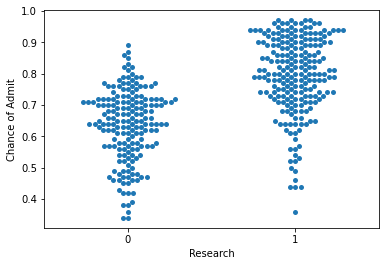

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.swarmplot(x='Research', y='ChanceOfAdmit', data=df)
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.show()

<AxesSubplot:>

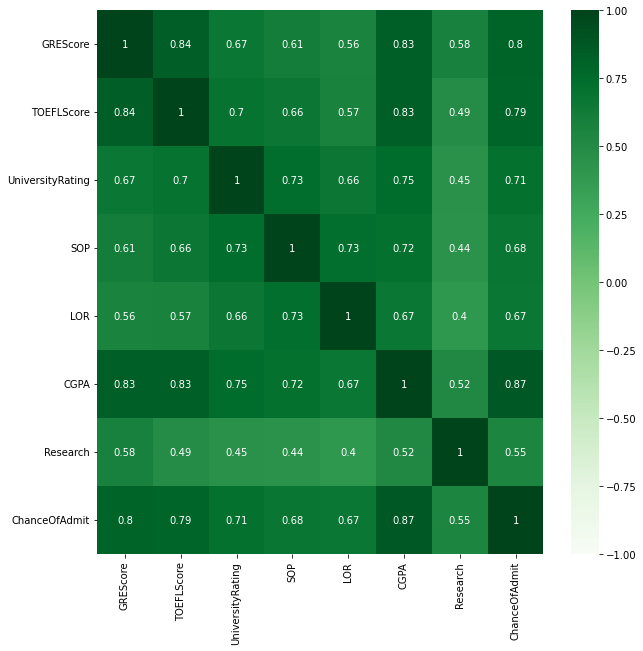

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(df.corr(numeric_only=True),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

- #### 합격률(ChanceOfAdmit)과 상관관계가 높은 변수는 CGPA > CREScore > TOEFLScore > UniversityRating > SOP > LOR > Research 순이다.
- #### 그렇다면 각 평가 점수가 합격률에 실제로 어떤 영향을 끼치는지 알고 싶다면 어떻게 해야할까?
- #### 독립변수가 종속변수에 영향을 끼치는 정도를 분석하는 방법이 바로 회귀분석이다.

### 3) 분석하기
- #### sm.add_constant() 함수는 독립변수에 상수항을 추가할때 사용한다.
- #### sm.OLS()는 선형회귀모델에서 사용하는 함수이고 fitted_multi_model에 적합 모델이 저장된다. 

In [12]:
import statsmodels.api as sm


x_data = df[['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA','Research']]
x_data1 = sm.add_constant(x_data, has_constant = "add")

target = df["ChanceOfAdmit"]

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          3.12e-134
Time:                        19:59:25   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2594      0.125    -10.097      0.000      -1.505      -1.014
GREScore             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFLScore           0.0029      0.001      2.680      0.008       0.001       0.005
UniversityRating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP                 -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR                  0.0224      0.006      4.034      0.000       0.011       0.033
CGPA                 0.1189      0.012      9.734      0.000       0.095       0.143
Research             0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 결과)
- #### 높은 GPA 필요: 위의 분석 결과에 따르면 GPA가 1점 증가할 때마다 합격 확률이 11.9% 증가한다. 높은 학점을 유지하도록 권장한다.
- #### TOEFL과 GRE 점수도 중요: TOEFL과 GRE 점수가 모두 유의미한 독립변수로 나타났다. 높은 점수를 받도록 권장한다.
- #### 질 높은 추천서: LOR이 1점 증가할 때 합격 확률이 2.2% 증가한다는 것을 고려하면 좋은 추천서를 받을 수 있는 방법을 찾도록 권장한다.
- #### 연구 경험 획득: 연구 경험이 있는 경우 합격 확률이 2.5% 증가한다는 것을 고려하여 연구 경험을 쌓을 수 있는 기회를 찾도록 권장한다.
- #### 학교 평가(UniversityRating)와 SOP(자기소개서)는 합격 확률에 큰 영향을 미치지 않는다.